In [1]:
import numpy as np
import pandas as pd

from algorithm.util.directed_graph import DirectedGraph
from algorithm.util.read_pairs_data import read_pairs_db
from algorithm.util.graph_vis import GraphVisualization
from algorithm.edmonds import EdmondsAlgorithm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import time

In [2]:
pairs = read_pairs_db(0, 99)
pairs.head()

,pair_num,donor_bloodtype,recipient_bloodtype,pra
0,P0,A,O,90
1,P1,B,A,5
2,P2,A,O,90
3,P3,A,A,92
4,P4,A,B,5


In [3]:
a = time.time()
grph = DirectedGraph(pairs)
b = time.time() - a
print(b, "s")

0.015956640243530273 s


In [4]:
cycles = grph.get_cycles()

In [5]:
cycles

[['P1', 'P4'],
 ['P1', 'P4', 'P3'],
 ['P4', 'P3', 'P5'],
 ['P1', 'P4', 'P3', 'P5', 'P19'],
 ['P3', 'P5', 'P19'],
 ['P5', 'P19'],
 ['P4', 'P3', 'P5', 'P19', 'P11'],
 ['P19', 'P11'],
 ['P1', 'P4', 'P3', 'P5', 'P19', 'P11', 'P27'],
 ['P3', 'P5', 'P19', 'P11', 'P27'],
 ['P5', 'P19', 'P11', 'P27'],
 ['P11', 'P27'],
 ['P1', 'P4', 'P3', 'P5', 'P19', 'P11', 'P27', 'P15'],
 ['P3', 'P5', 'P19', 'P11', 'P27', 'P15'],
 ['P5', 'P19', 'P11', 'P27', 'P15'],
 ['P11', 'P27', 'P15'],
 ['P4', 'P3', 'P5', 'P19', 'P11', 'P27', 'P15', 'P17'],
 ['P19', 'P11', 'P27', 'P15', 'P17'],
 ['P27', 'P15', 'P17'],
 ['P1', 'P4', 'P3', 'P5', 'P19', 'P11', 'P27', 'P15', 'P17', 'P36'],
 ['P3', 'P5', 'P19', 'P11', 'P27', 'P15', 'P17', 'P36'],
 ['P5', 'P19', 'P11', 'P27', 'P15', 'P17', 'P36'],
 ['P11', 'P27', 'P15', 'P17', 'P36'],
 ['P15', 'P17', 'P36'],
 ['P17', 'P36'],
 ['P4', 'P3', 'P5', 'P19', 'P11', 'P27', 'P15', 'P17', 'P36', 'P21', 'P39'],
 ['P19', 'P11', 'P27', 'P15', 'P17', 'P36', 'P21', 'P39'],
 ['P27', 'P15', 'P1

In [6]:
edmond = EdmondsAlgorithm(priority_threshold=100)

In [7]:
a = time.time()
edmond.finalize_exchange(grph)
b = time.time() - a
print(b, "s")

0.003990650177001953 s


In [8]:
edmond.show_donation_mapping('text')

P31 --> P95
P39 --> P41
P1 --> P4
P5 --> P19
P11 --> P27
P17 --> P36
P32 --> P52
P66 --> P47
P55 --> P81
P54 --> P6
P7 --> P75
P29 --> P44
P60 --> P9
P85 --> P10
P69 --> P49
P14 --> P18
P40 --> P43
P59 --> P63


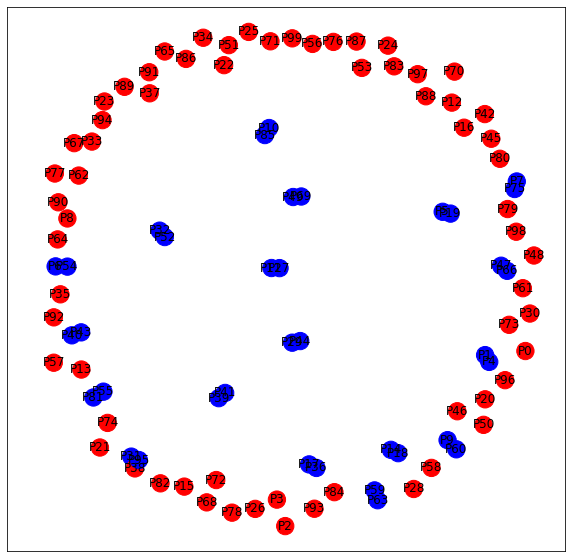

In [9]:
plt.figure(figsize=(10, 10))
edmond.show_donation_mapping('graph')

In [10]:
edmond.get_num_of_matched_pairs()

36